In [42]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
cat4_img=cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4_img=cv2.cvtColor(cat4_img,cv2.COLOR_BGR2RGB)

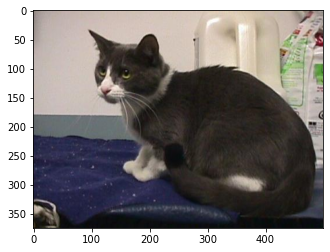

In [4]:
plt.imshow(cat4_img)

In [5]:
cat4_img.shape

(375, 500, 3)

In [6]:
dog2_img=cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog2_img=cv2.cvtColor(dog2_img,cv2.COLOR_BGR2RGB)

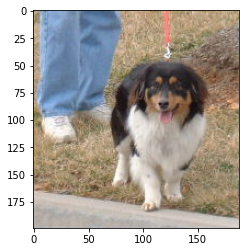

In [8]:
plt.imshow(dog2_img)

In [9]:
dog2_img.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                                   zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')

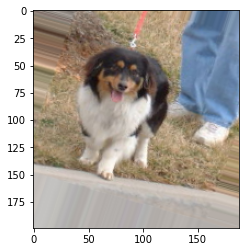

In [12]:
plt.imshow(image_generator.random_transform(dog2_img))

In [13]:
image_generator.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
from keras.models import Sequential

In [22]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(128))
model.add(Activation('relu'))

In [32]:
model.add(Dropout(0.5))

In [33]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [37]:
#train the model
input_shape=(150,150,3)

In [38]:
batch_size=16
train_image_generator=image_generator.flow_from_directory('CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 18743 images belonging to 2 classes.


In [39]:
test_image_generator=image_generator.flow_from_directory('CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 6251 images belonging to 2 classes.


In [40]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [46]:
results=model.fit(train_image_generator,epochs=100,steps_per_epoch=150,validation_data=test_image_generator,
                           validation_steps=12)

Epoch 1/100
150/150 [==============================] - 61s 407ms/step - loss: 0.6930 - accuracy: 0.5038 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 2/100
150/150 [==============================] - 60s 402ms/step - loss: 0.6936 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.4323
Epoch 3/100
150/150 [==============================] - 61s 403ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6947 - val_accuracy: 0.4427
Epoch 4/100
150/150 [==============================] - 62s 414ms/step - loss: 0.6934 - accuracy: 0.5046 - val_loss: 0.6937 - val_accuracy: 0.4844
Epoch 5/100
150/150 [==============================] - 57s 380ms/step - loss: 0.6928 - accuracy: 0.5054 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 6/100
150/150 [==============================] - 62s 413ms/step - loss: 0.6935 - accuracy: 0.4883 - val_loss: 0.6929 - val_accuracy: 0.5208
Epoch 7/100
150/150 [==============================] - 60s 403ms/step - loss: 0.6934 - accuracy: 0.4804 - val_loss: 0.6922 -

In [47]:
results.history['accuracy']

[0.5037500262260437,
 0.4933333396911621,
 0.5024999976158142,
 0.5045833587646484,
 0.5054166913032532,
 0.4883333444595337,
 0.4804166555404663,
 0.49416667222976685,
 0.49416667222976685,
 0.4975000023841858,
 0.49666666984558105,
 0.49811795353889465,
 0.4958333373069763,
 0.4987500011920929,
 0.49916666746139526,
 0.5149999856948853,
 0.49000000953674316,
 0.4910079538822174,
 0.48625001311302185,
 0.4883333444595337,
 0.5045833587646484,
 0.4962500035762787,
 0.49041667580604553,
 0.5140108466148376,
 0.5041666626930237,
 0.48124998807907104,
 0.49916666746139526,
 0.4901714622974396,
 0.4866666793823242,
 0.49541667103767395,
 0.5183333158493042,
 0.5,
 0.5045833587646484,
 0.5049999952316284,
 0.5004166960716248,
 0.5024999976158142,
 0.5174999833106995,
 0.5004166960716248,
 0.5016666650772095,
 0.49041667580604553,
 0.4820833206176758,
 0.5039732456207275,
 0.5112500190734863,
 0.4962500035762787,
 0.5087500214576721,
 0.4925000071525574,
 0.4962500035762787,
 0.5170833468437

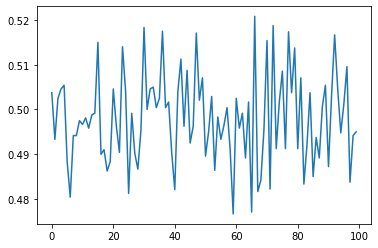

In [48]:
plt.plot(results.history['accuracy'])

In [ ]:
#predict on new image

In [50]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [51]:
import numpy as np
from keras.preprocessing import image

In [56]:
dog_img_2 = 'CATS_DOGS/train/Dog/5.jpg'

In [57]:
dog_img = image.load_img(dog_img_2, target_size=(150, 150))

In [58]:
dog_img = image.img_to_array(dog_img)

In [59]:
dog_img = np.expand_dims(dog_img, axis=0)

In [60]:
dog_img = dog_img/255

In [61]:
prediction_prob = model.predict(dog_img)

In [62]:
print(f'Probability that image is a dog is: {prediction_prob}')

Probability that image is a dog is: [[0.49867713]]
